Text(0, 0.5, 'target, y')

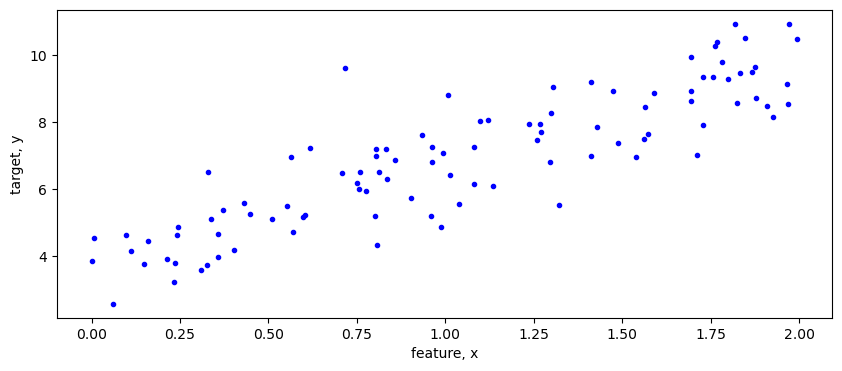

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)
plt.figure(figsize=(10,4))
plt.plot(x,y,"b.")
plt.xlabel('feature, x')
plt.ylabel('target, y')

In [2]:
X_p = np.c_[np.ones((100,1)), x]

In [3]:
X_p[0:10,]

array([[1.        , 1.84731794],
       [1.        , 0.23178389],
       [1.        , 0.96014281],
       [1.        , 0.81206623],
       [1.        , 0.80334556],
       [1.        , 0.70806465],
       [1.        , 0.75813141],
       [1.        , 1.26919864],
       [1.        , 0.96351931],
       [1.        , 0.06046217]])

In [4]:
theta_best = np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T).dot(y)

In [5]:
theta_best

array([[3.80432648],
       [2.98385495]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.80432648],
       [9.77203638]])

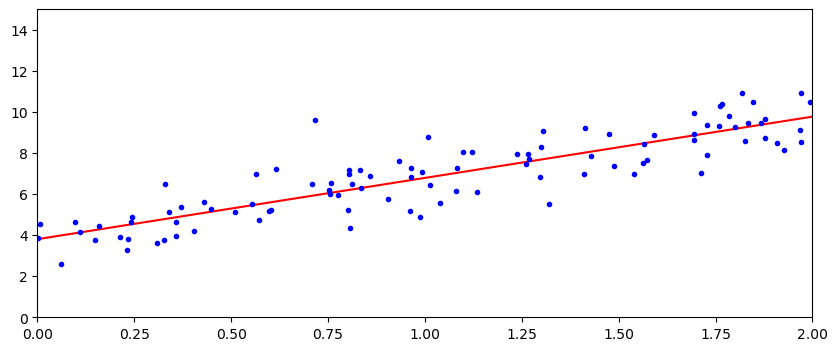

In [7]:
plt.figure(figsize=(10,4))
plt.plot(X_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
alpha = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m* X_p.T.dot(X_p.dot(theta)-y)
    theta = theta - alpha*gradients

In [10]:
theta

array([[3.80432648],
       [2.98385495]])

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # tambahkan x0 = 1 pada setiap training␣example
y_predict = X_new_b.dot(theta_best)

In [12]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [13]:
y_predict

array([[3.80432648],
       [9.77203638]])

<function matplotlib.pyplot.show(close=None, block=None)>

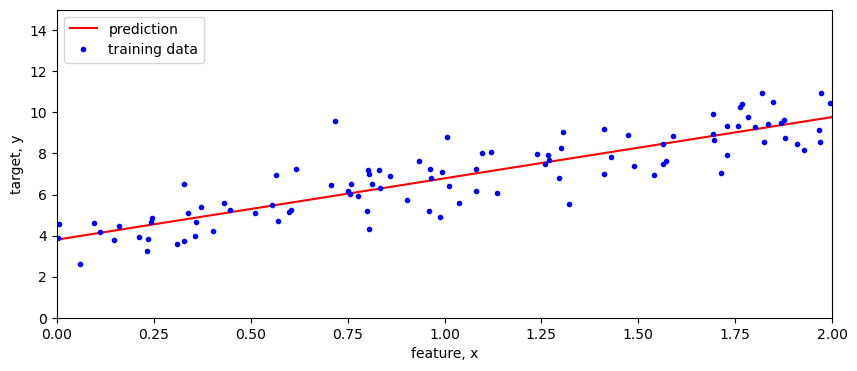

In [14]:
plt.figure(figsize=(10,4))
plt.plot(X_new,y_predict,'r-',label='prediction')
plt.plot(x,y,'b.',label='training data')
plt.axis([0,2,0,15])
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.legend(loc='upper left')
plt.show

In [16]:
theta_path_bgd = []
def plot_gradient_descent(theta, alpha, theta_path=None):
    m = len(X_p)
    plt.plot(x, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_p.T.dot(X_p.dot(theta) - y)
        theta = theta - alpha * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

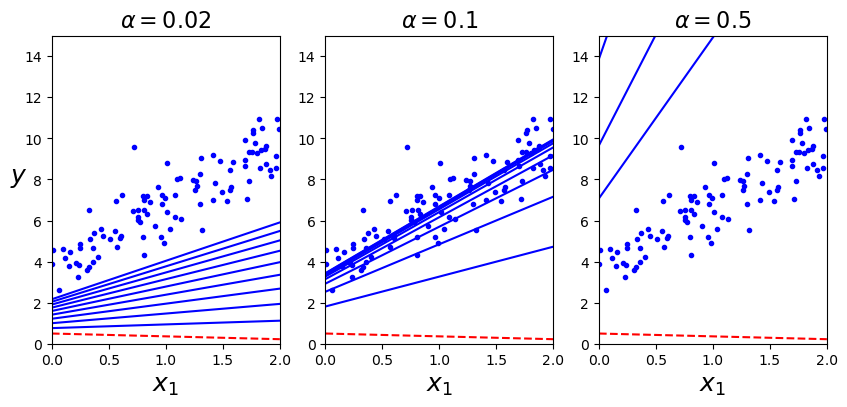

In [17]:
np.random.seed(42)
theta = np.random.randn(2,1)
# random initialization
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, alpha=0.1,theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, alpha=0.5)
plt.show()

In [18]:
theta_path_sgd = []
m = len(X_p)
np.random.seed(42)

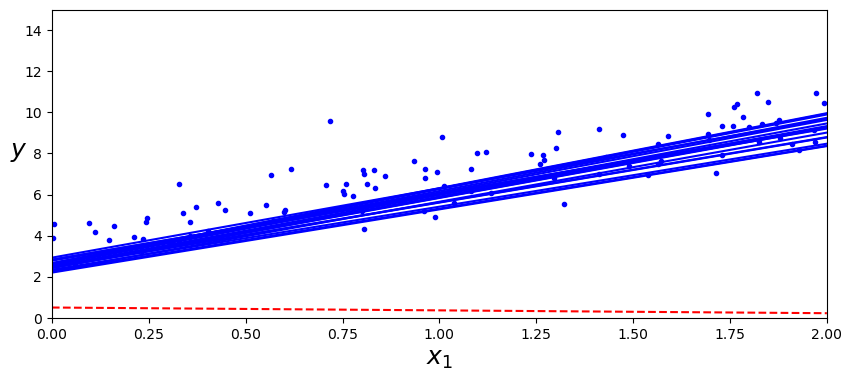

In [19]:
n_epochs = 50
t0, t1 = 5, 50
# learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
# random initialization
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_p[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * m + i)
        theta = theta - alpha * gradients
        theta_path_sgd.append(theta)
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
theta

array([[3.79225455],
       [2.97895747]])

In [22]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)
# random initialization
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_p_shuffled = X_p[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_p_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(t)
        theta = theta - alpha * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[3.79776273],
       [2.96179387]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

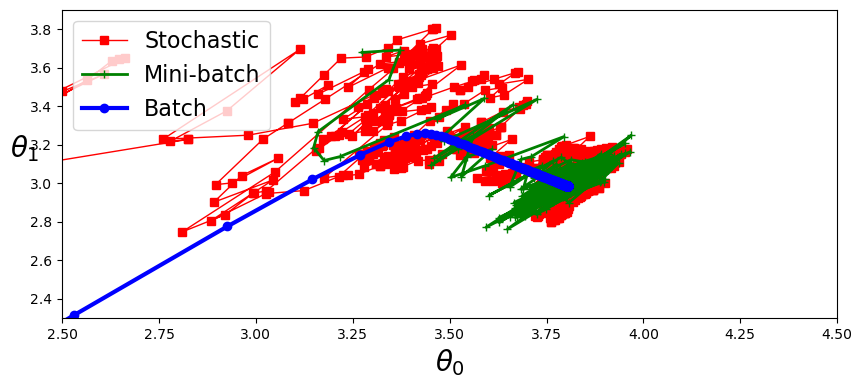

In [26]:
plt.figure(figsize=(10,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

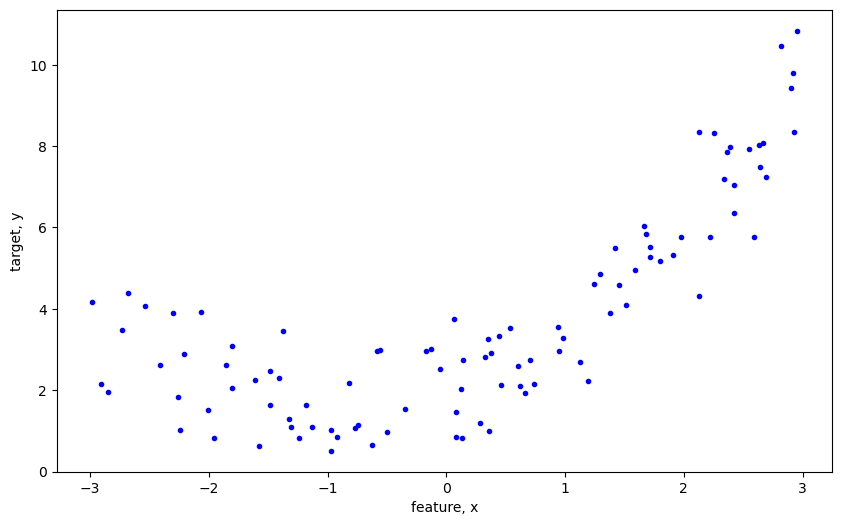

In [27]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*(X**2)+X+2+np.random.randn(m,1)
#plotting data
plt.figure(figsize=(10,6))
plt.plot(X,y,'b.')
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.show

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [29]:
X[0]

array([2.38942838])

In [30]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

<function matplotlib.pyplot.show(close=None, block=None)>

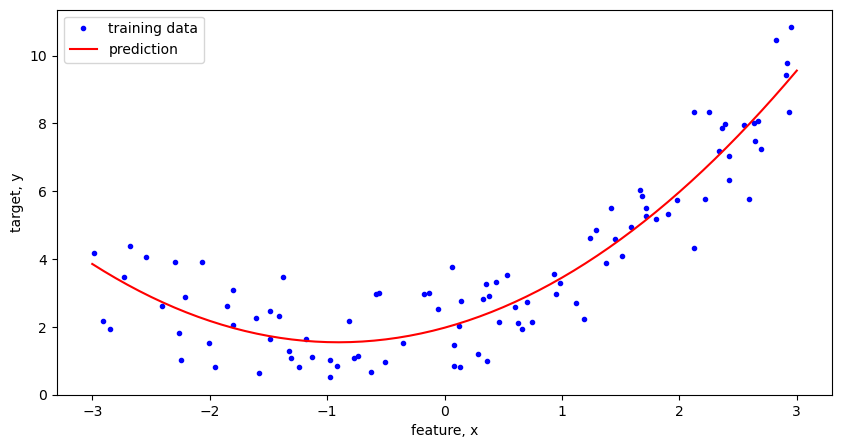

In [32]:
x_lin = np.arange(-3,3.1,0.1)
y_est = lin_reg.coef_[0,1]*(x_lin**2)+lin_reg.coef_[0,0]*x_lin+lin_reg.intercept_
#plotting data
plt.figure(figsize=(10,5))
plt.plot(X,y,'b.',label='training data')
plt.plot(x_lin,y_est,'r-',label='prediction')
plt.xlabel('feature, x')
plt.ylabel('target, y')
plt.legend(loc='upper left')
plt.show

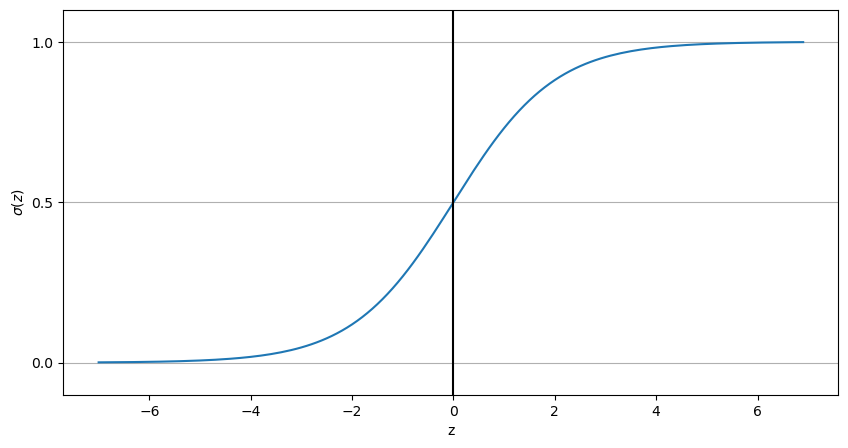

In [34]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1+np.exp(-z))
z = np.arange(-7,7,0.1)
gama_z = sigmoid(z)
plt.figure(figsize=(10,5))
plt.plot(z,gama_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

In [35]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [36]:
X = iris['data'][:,3:] #lebar petal
y = (iris['target']==2).astype(np.int) # 1 jika iris virginica dan yang lain 0

/tmp/ipykernel_174002/2108231349.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target']==2).astype(np.int) # 1 jika iris virginica dan yang lain 0


In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

/home/fatjri/Downloads/Documents/envs/tensorflow/lib/python3.9/site-packages/matplotlib/patches.py:1475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


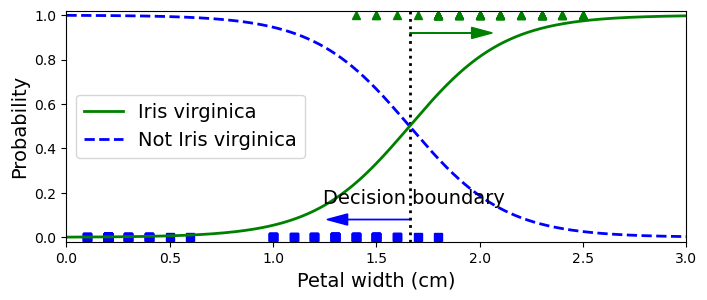

In [39]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14,color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1,fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1,fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [40]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

/tmp/ipykernel_174002/3554080504.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


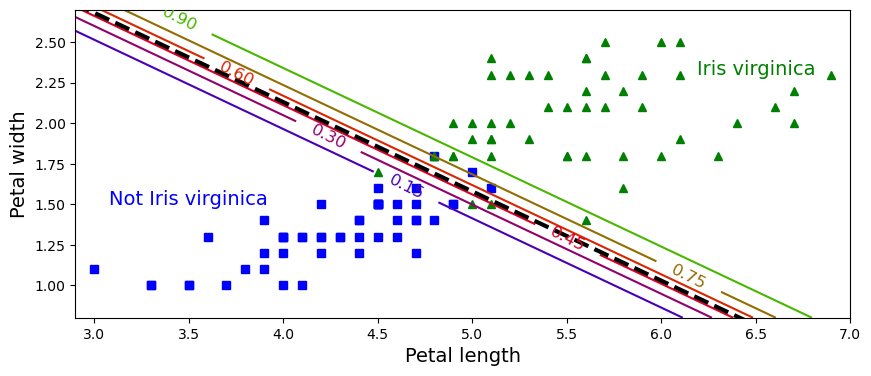

In [42]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.int)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [43]:
X = iris["data"][:, (2, 3)]
y = iris["target"]
# petal length, petal width
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10,random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [45]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [46]:
softmax_reg.predict([[5, 2]])

array([2])

In [47]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

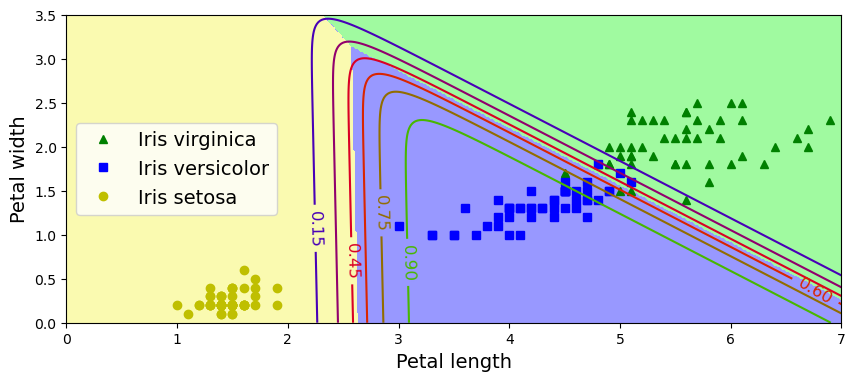

In [48]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),np.linspace(0, 3.5, 200).reshape(-1, 1),)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()